In [1]:
import torch
import torch.utils.data as Data
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from Model import NTGEncoder, NTGDecoder, EncoderDecoder
from Train import trainNTG, predictNTG, train_test
import Utils

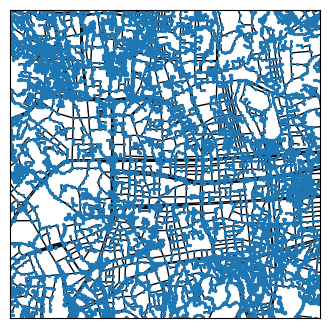

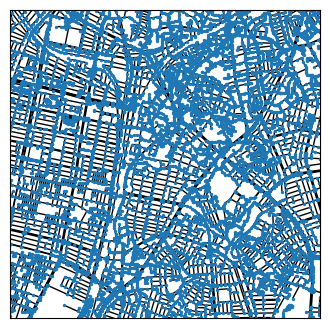

In [4]:
osm1 = Utils.get_osm(1)
osm2 = Utils.get_osm(2)
osm1.draw_graph(figsize=(4, 4))
osm2.draw_graph(figsize=(4, 4))
plt.show()

In [5]:
osmg1 = osm1.graph
osmg2 = osm2.graph
osmg = nx.union(osmg1, osmg2)
# lcs = Utils.get_lcs(osmg)
print(osmg)

Graph with 31996 nodes and 33985 edges


In [6]:
K = 2
L = 5
hidden_size, embed_size, num_layers, batch_size = 500, 128, 2, 256
lr, wd, num_epochs, device = 1e-3, 1e-4, 20, torch.device('cuda')

In [7]:
encset, decset, validlen = Utils.get_dataset(osmg, K, L)
print(encset.shape)
print(decset.shape)
print(validlen.shape)

torch.Size([21890, 2, 5])
torch.Size([21890, 9])
torch.Size([21890])


In [8]:
dataset_length = encset.shape[0]
train_length = round(dataset_length * 0.8)
test_length = dataset_length - train_length

train_idx, test_idx = Data.random_split(encset, [train_length, test_length])

train_encset = encset[train_idx.indices]
train_decset = decset[train_idx.indices]
train_validlen = validlen[train_idx.indices]
train_dataset = Data.TensorDataset(train_encset, train_decset, train_validlen)

test_encset = encset[test_idx.indices]
test_decset = decset[test_idx.indices]
test_validlen = validlen[test_idx.indices]
test_dataset = Data.TensorDataset(test_encset, test_decset, test_validlen)

train_loader = Data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)
test_loader = Data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=True,
)

In [9]:
pos_vocab = Utils.get_vocab(100)

encoder = NTGEncoder(len(pos_vocab), embed_size, hidden_size, num_layers)
decoder = NTGDecoder(len(pos_vocab), embed_size, hidden_size, num_layers)
net = EncoderDecoder(encoder, decoder)

In [10]:
train_losses, test_losses = train_test(net, train_loader, test_loader, lr, wd, num_epochs, device, pos_vocab,
                                       train_length, test_length)

epoch:0, train_loss:2.276611122490337, test_loss:2.1200539914371217
epoch:1, train_loss:2.0001617098791296, test_loss:2.040542637392395
epoch:2, train_loss:1.803365370191467, test_loss:1.895621470089316
epoch:3, train_loss:1.5112413673871399, test_loss:1.8327060375326896
epoch:4, train_loss:1.221694877889397, test_loss:1.839756223696887
epoch:5, train_loss:0.9919036060993722, test_loss:1.8861037873415818
epoch:6, train_loss:0.8179272215570038, test_loss:1.9372012424599694
epoch:7, train_loss:0.6780388057912632, test_loss:1.9925331614125315
epoch:8, train_loss:0.5582366754280045, test_loss:2.0518660852494115
epoch:9, train_loss:0.45681039445092003, test_loss:2.1359571611135175
epoch:10, train_loss:0.3723496597833751, test_loss:2.2012803525127413
epoch:11, train_loss:0.30117650421965114, test_loss:2.2660904767144046
epoch:12, train_loss:0.2470663207042375, test_loss:2.3103884631174783
epoch:13, train_loss:0.19833402200178665, test_loss:2.395609545892861
epoch:14, train_loss:0.16386173206

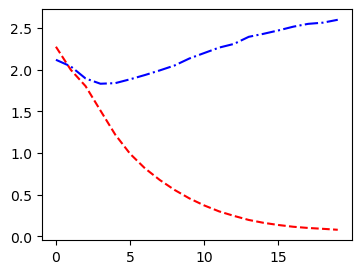

In [12]:
plt.figure(figsize=(4, 3))
plt.plot(train_losses, 'r--', label='train_loss')
plt.plot(test_losses, 'b-.', label='test_loss')
plt.show()